# Gradient Boosting - Lab

## Introduction

In this lab, we'll learn how to use both Adaboost and Gradient Boosting classifiers from scikit-learn!

## Objectives

You will be able to:

- Use AdaBoost to make predictions on a dataset 
- Use Gradient Boosting to make predictions on a dataset 

## Getting Started

In this lab, we'll learn how to use boosting algorithms to make classifications on the [Pima Indians Dataset](http://ftp.ics.uci.edu/pub/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.names). You will find the data stored in the file `'pima-indians-diabetes.csv'`. Our goal is to use boosting algorithms to determine whether a person has diabetes. Let's get started!

We'll begin by importing everything we need for this lab. Run cell below:

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix

Now, use Pandas to import the data stored in `'pima-indians-diabetes.csv'` and store it in a DataFrame. Print the first five rows to inspect the data we've imported and ensure everything loaded correctly. 

In [2]:
# Import the data
df = pd.read_csv('pima-indians-diabetes.csv')

# Print the first five rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Cleaning, exploration, and preprocessing

The target we're trying to predict is the `'Outcome'` column. A `1` denotes a patient with diabetes. 

By now, you're quite familiar with exploring and preprocessing a dataset.  

In the following cells:

* Check for missing values and deal with them as you see fit (if any exist) 
* Count the number of patients with and without diabetes in this dataset 
* Store the target column in a separate variable and remove it from the dataset
* Split the dataset into training and test sets, with a `test_size` of 0.25 and a `random_state` of 42

In [4]:
# Check for missing values
for x in df.columns:
    display(df[x].value_counts())

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

100    17
99     17
129    14
125    14
111    14
       ..
177     1
172     1
169     1
160     1
199     1
Name: Glucose, Length: 136, dtype: int64

70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
92      8
75      8
65      7
94      6
85      6
48      5
44      4
96      4
110     3
100     3
98      3
106     3
108     2
104     2
30      2
55      2
46      2
40      1
38      1
24      1
95      1
61      1
102     1
114     1
122     1
Name: BloodPressure, dtype: int64

0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     19
39     18
19     18
29     17
37     16
26     16
22     16
40     16
25     16
35     15
41     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
34      8
46      8
38      7
12      7
14      6
16      6
11      6
43      6
45      6
10      5
44      5
48      4
47      4
50      3
49      3
54      2
52      2
7       2
8       2
60      1
56      1
63      1
51      1
99      1
Name: SkinThickness, dtype: int64

0      374
105     11
140      9
130      9
120      8
      ... 
271      1
270      1
108      1
112      1
846      1
Name: Insulin, Length: 186, dtype: int64

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
        ..
32.1     1
52.9     1
31.3     1
45.7     1
42.8     1
Name: BMI, Length: 248, dtype: int64

0.254    6
0.258    6
0.259    5
0.238    5
0.207    5
        ..
0.886    1
0.804    1
1.251    1
0.382    1
0.375    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
# Number of patients with and without diabetes


In [6]:
y = df.Outcome
X = df.drop(columns = 'Outcome')

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

## Train the models

Now that we've explored the dataset, we're ready to fit some models!

In the cell below:

* Instantiate an `AdaBoostClassifier` (set the `random_state` for 42)
* Instantiate a `GradientBoostingClassifer` (set the `random_state` for 42) 

In [8]:
# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state = 42)


# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state = 42)

Now, fit the training data to both the classifiers: 

In [9]:
# Fit AdaBoostClassifier
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [10]:
# Fit GradientBoostingClassifier
gbt_clf.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

Now, let's use these models to predict labels on both the training and test sets: 

In [20]:
# AdaBoost model predictions
adaboost_y_hat_train = adaboost_clf.predict(X_train)
adaboost_y_hat_test = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_y_hat_train = gbt_clf.predict(X_train)
gbt_y_hat_test = gbt_clf.predict(X_test)

Now, complete the following function and use it to calculate the accuracy and f1-score for each model: 

In [21]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true,preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_y_hat_train, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_y_hat_train, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_y_hat_test, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_y_hat_test, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.8229166666666666
F1-Score: 0.7315789473684211

Model: Gradient Boosted Trees
Accuracy: 0.9270833333333334
F1-Score: 0.888888888888889

Testing Metrics
Model: AdaBoost
Accuracy: 0.796875
F1-Score: 0.711111111111111

Model: Gradient Boosted Trees
Accuracy: 0.7864583333333334
F1-Score: 0.6870229007633588


Let's go one step further and create a confusion matrix and classification report for each. Do so in the cell below: 

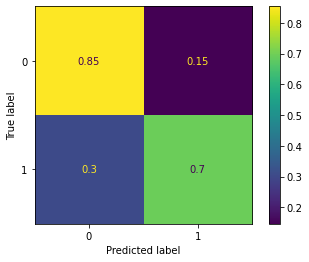

In [26]:
adaboost_confusion_matrix = plot_confusion_matrix(adaboost_clf,X_test, y_test, normalize = 'true')
adaboost_confusion_matrix

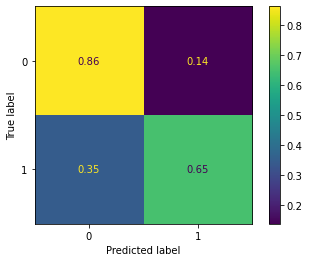

In [28]:
gbt_confusion_matrix = plot_confusion_matrix(gbt_clf, X_test, y_test, normalize = 'true')
gbt_confusion_matrix

In [29]:
adaboost_classification_report = classification_report(y_test, adaboost_y_hat_test)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       123
           1       0.73      0.70      0.71        69

    accuracy                           0.80       192
   macro avg       0.78      0.77      0.78       192
weighted avg       0.80      0.80      0.80       192



In [30]:
gbt_classification_report = classification_report(y_test, gbt_y_hat_test)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       123
           1       0.73      0.65      0.69        69

    accuracy                           0.79       192
   macro avg       0.77      0.76      0.76       192
weighted avg       0.78      0.79      0.78       192



**_Question:_** How did the models perform? Interpret the evaluation metrics above to answer this question.

Write your answer below this line:
_______________________________________________________________________________________________________________________________

 
 
As a final performance check, let's calculate the 5-fold cross-validated score for each model! 

Recall that to compute the cross-validation score, we need to pass in:

* A classifier
* All training data
* All labels
* The number of folds we want in our cross-validation score  

Since we're computing cross-validation score, we'll want to pass in the entire dataset, as well as all of the labels. 

In the cells below, compute the mean cross validation score for each model. 

In [37]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, X_test, y_test, cv = 5))
# Expected Output: 0.7631270690094218

Mean Adaboost Cross-Val Score (k=5):
[0.74358974 0.76923077 0.71052632 0.71052632 0.81578947]


In [38]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, X_test, y_test, cv = 5))
# Expected Output: 0.7591715474068416

Mean GBT Cross-Val Score (k=5):
[0.76923077 0.69230769 0.76315789 0.71052632 0.84210526]


These models didn't do poorly, but we could probably do a bit better by tuning some of the important parameters such as the **_Learning Rate_**. 

## Summary

In this lab, we learned how to use scikit-learn's implementations of popular boosting algorithms such as AdaBoost and Gradient Boosted Trees to make classification predictions on a real-world dataset!